In [2]:
import os
import sys
import numpy as np
import matplotlib.pyplot as plt

def path_link(path:str):
    sys.path.append(path)

path_link('master/code/lib')

import features as ft
import simulation as sim 
#import simulation_2 as sim2
#import simulation_3 as sim3
import NNSimulator as nnsim
#import NNSimulator_2 as nnsim2
import display as disp

from norm import normalizeCol


PATH_MODEL = 'master/code/models/'

In [3]:
def loadModel(modelName:str, inputShape:int = 9, edges_shape = 3, path = PATH_MODEL):
    """ 
    Function to import the model

    Args:
    -----
        - `modelName`: name of the model
        - `inputShape`: inout shape of the NN
        - `edges_shape`: edge shape of the NN
        - `path`: path where the models are
    """

    sys.path.append(path)

    loadFun = __import__(f'{modelName}', fromlist = ('loadNetwork'))

    model = loadFun.loadNetwork(inputShape, edges_shape)

    return model

In [4]:
# generate a simulation
data = sim.compute_main(100, (60, 3.5, 70, 0.5), 120, T = 450)[0]
id = 0

# get speeds
v = ft.getSpeeds(data)

mat = ft.getFeatures(data, np.array([0.1]))

featuresData = mat[0][id]

nextState = mat[1][id]

edge_ind, edge_atr = ft.getEdges(data)

edge_ind = edge_ind[id]
edge_atr = edge_atr[id]

v0:60, tau:3.5, k:70, epsilon:0.5


100%|██████████| 450/450 [00:02<00:00, 192.60it/s]


TypeError: only integer scalar arrays can be converted to a scalar index

In [26]:
edge_atr = normalizeCol(edge_atr, -8, 8)

In [63]:
inds = np.arange(data.shape[0]-1-5) + 5
import torch
speeds = torch.from_numpy(data[inds+1, :, :] - data[inds, :, :]) 

In [64]:
mod = loadModel('model_gt')

#res  = nnsim2.getSimulationData(mod, 450, data, i = 5, display =True, train = True).detach().cpu().numpy()
res1  = nnsim2.getSimulationData(mod, 300, data, i = 5, debug =speeds.clone(), train = True)

In [38]:
res = nnsim2.getSimulationData(mod, 450, data, i = 5, display =True, train = False).detach().cpu().numpy()

  0%|          | 0/450 [00:00<?, ?it/s]


TypeError: unsupported operand type(s) for +: 'Tensor' and 'Data'

In [7]:
print(res)

[[[-6.7076912e+00 -1.2044786e+01]
  [ 1.0512610e+01  9.1655692e-03]
  [ 5.0864558e+00 -2.5154173e+00]
  ...
  [-1.3638166e+01 -1.0110021e+01]
  [ 1.9843127e+00 -1.3649011e+01]
  [-5.9376211e+00  3.2489817e+00]]

 [[-7.8006296e+00 -1.2476010e+01]
  [ 9.4459867e+00  5.9937894e-01]
  [ 4.7045226e+00 -2.9519253e+00]
  ...
  [-1.3896918e+01 -1.0554628e+01]
  [ 8.2406759e-01 -1.5228206e+01]
  [-5.2568684e+00  3.5618536e+00]]

 [[-8.8935680e+00 -1.2907234e+01]
  [ 8.3793631e+00  1.1895924e+00]
  [ 4.3225894e+00 -3.3884332e+00]
  ...
  [-1.4155670e+01 -1.0999236e+01]
  [-3.3617747e-01 -1.6807400e+01]
  [-4.5761156e+00  3.8747256e+00]]

 ...

 [[-1.9822952e+01 -3.4468464e+01]
  [ 1.0512608e+01 -2.4779806e+01]
  [-7.3591995e+01 -4.1801147e+01]
  ...
  [-1.1041113e+02 -3.0561951e+01]
  [-3.9784512e+01  5.3013301e+00]
  [-6.0397823e+01  9.6484818e+01]]

 [[-2.0915892e+01 -3.4037239e+01]
  [ 9.4459839e+00 -2.5370020e+01]
  [-7.3210060e+01 -4.1364639e+01]
  ...
  [-1.1015238e+02 -3.0117344e+01]
  [-

In [65]:
print(res1[0])
print(res1[0].shape)

tensor([[[-6.7077e+00, -1.2045e+01],
         [ 1.0513e+01,  9.1656e-03],
         [ 5.0865e+00, -2.5154e+00],
         ...,
         [-1.3638e+01, -1.0110e+01],
         [ 1.9843e+00, -1.3649e+01],
         [-5.9376e+00,  3.2490e+00]],

        [[-6.4566e+00, -1.1831e+01],
         [ 9.4011e+00,  1.4728e+00],
         [ 5.3145e+00, -1.6938e+00],
         ...,
         [-1.4538e+01, -1.0707e+01],
         [ 2.6193e+00, -1.4153e+01],
         [-5.7753e+00,  2.8642e+00]],

        [[-5.4154e+00, -1.2934e+01],
         [ 9.2004e+00,  9.4837e-01],
         [ 3.9744e+00, -3.0634e-01],
         ...,
         [-1.4930e+01, -1.0657e+01],
         [ 2.4416e+00, -1.5106e+01],
         [-4.7184e+00,  3.3408e+00]],

        ...,

        [[ 5.9869e+01, -5.5883e+01],
         [-7.2395e+01,  1.1436e+02],
         [-9.9907e+01,  9.8040e+01],
         ...,
         [-9.1500e+01, -6.2445e+01],
         [-1.0935e+02, -6.5731e+01],
         [ 7.0331e+01, -2.5590e+01]],

        [[ 6.0143e+01, -5.5349e+01

In [66]:
print(data[5:306, :, :])
print(data[5:306, :, :].shape)

[[[-6.70769103e+00 -1.20447869e+01]
  [ 1.05126102e+01  9.16556951e-03]
  [ 5.08645587e+00 -2.51541739e+00]
  ...
  [-1.36381665e+01 -1.01100205e+01]
  [ 1.98431264e+00 -1.36490104e+01]
  [-5.93762117e+00  3.24898169e+00]]

 [[-6.45658512e+00 -1.18311370e+01]
  [ 9.40114857e+00  1.47279832e+00]
  [ 5.31446233e+00 -1.69377891e+00]
  ...
  [-1.45381082e+01 -1.07071892e+01]
  [ 2.61932640e+00 -1.41529211e+01]
  [-5.77534492e+00  2.86416658e+00]]

 [[-5.41538971e+00 -1.29339339e+01]
  [ 9.20036558e+00  9.48371734e-01]
  [ 3.97441838e+00 -3.06338833e-01]
  ...
  [-1.49304812e+01 -1.06573496e+01]
  [ 2.44162826e+00 -1.51055446e+01]
  [-4.71842688e+00  3.34077970e+00]]

 ...

 [[ 5.98691838e+01 -5.58831319e+01]
  [-7.23951659e+01  1.14358909e+02]
  [-9.99069776e+01  9.80404868e+01]
  ...
  [-9.15002698e+01 -6.24448690e+01]
  [-1.09351325e+02 -6.57308891e+01]
  [ 7.03307823e+01 -2.55903050e+01]]

 [[ 6.01431380e+01 -5.53493257e+01]
  [-7.26528529e+01  1.14245718e+02]
  [-1.00272770e+02  9.7564

In [31]:
print(res1[1])

tensor([[[-0.0738, -1.0999],
         [ 0.6307,  0.8257],
         [-0.7315,  1.3630],
         ...,
         [ 0.2377, -0.8401],
         [-0.1215, -1.7602],
         [-0.1529,  0.0554]],

        [[ 0.7320, -0.9658],
         [ 0.4175,  1.0415],
         [-0.8946,  0.5743],
         ...,
         [-1.8204, -1.1515],
         [ 0.6650,  0.2300],
         [ 1.2095, -0.7060]],

        [[ 2.1054, -0.6407],
         [ 0.5988,  0.8087],
         [-0.7992,  0.6345],
         ...,
         [-0.7873, -1.2387],
         [ 0.6891, -0.2488],
         [ 0.4422, -0.6524]],

        ...,

        [[ 0.2740,  0.5338],
         [-0.2577, -0.1132],
         [-0.3658, -0.4756],
         ...,
         [ 0.1226, -0.3516],
         [-0.3595,  0.4880],
         [-0.5911, -0.1032]],

        [[ 0.2740,  0.5338],
         [-0.2577, -0.1132],
         [-0.3658, -0.4756],
         ...,
         [ 0.1226, -0.3516],
         [-0.3595,  0.4880],
         [-0.5911, -0.1032]],

        [[ 0.2740,  0.5338],
       

In [70]:
print(res1[1].cpu() - speeds[:300])
print(torch.sum(res1[1].cpu() - speeds[:300]))

tensor([[[0., 0.],
         [0., 0.],
         [0., 0.],
         ...,
         [0., 0.],
         [0., 0.],
         [0., 0.]],

        [[0., 0.],
         [0., 0.],
         [0., 0.],
         ...,
         [0., 0.],
         [0., 0.],
         [0., 0.]],

        [[0., 0.],
         [0., 0.],
         [0., 0.],
         ...,
         [0., 0.],
         [0., 0.],
         [0., 0.]],

        ...,

        [[0., 0.],
         [0., 0.],
         [0., 0.],
         ...,
         [0., 0.],
         [0., 0.],
         [0., 0.]],

        [[0., 0.],
         [0., 0.],
         [0., 0.],
         ...,
         [0., 0.],
         [0., 0.],
         [0., 0.]],

        [[0., 0.],
         [0., 0.],
         [0., 0.],
         ...,
         [0., 0.],
         [0., 0.],
         [0., 0.]]], dtype=torch.float64)
tensor(0., dtype=torch.float64)


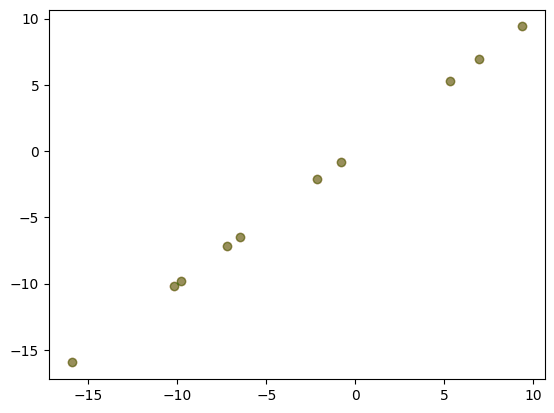

In [68]:
import matplotlib.pyplot as plt
comp = res1[0].cpu().detach().numpy()
s = speeds.cpu().detach().numpy()
i = 1
plt.scatter(data[5 + i, :10, 0], data[5 + i, :10, 0], color = 'red',alpha = 0.4)
plt.scatter(comp[i, :10, 0], comp[i, :10, 0], color = 'green',alpha = 0.4)
#plt.scatter(data[5 + i - 1, :10, 0] + s[i-1, :10, 0], data[5 + i - 1, :10, 0] + s[i-1, :10, 1], color = 'blue',alpha = 0.4)
plt.show()

In [69]:
comp = res1[0].cpu().detach().numpy()
cwd = os.getcwd()
p = '/master/tests/data/comp.mp4'
vidParams = disp.videoParameters(p)
import cv2

def compareVideo(data, ground_truth, video_params, bounds=None):
    """
    Creates an MP4 video from a PyTorch tensor representing cell movements using cv2,
    and includes ground truth data visualized in a different color.

    Parameters:
    - data: A PyTorch tensor of shape [T, N, 2], where T is the number of timesteps,
            N is the number of cells, and 2 corresponds to the coordinates (x, y).
    - ground_truth: A PyTorch tensor of shape [T, N, 2], same format as data, representing the ground truth.
    - video_params: An instance of videoParameters class containing video settings.
    - bounds: Tuple of ((min_x, max_x), (min_y, max_y)) specifying the bounds for the positions.
              If None, it uses the minimum and maximum values from the data.
    """
    
    if bounds:
        min_x, max_x = bounds[0]
        min_y, max_y = bounds[1]
    else:
        min_x, max_x = min(data.min(), ground_truth.min()), max(data.max(), ground_truth.max())
        min_y, max_y = min(data.min(), ground_truth.min()), max(data.max(), ground_truth.max())

    # Normalize coordinates to fit within the video frame size
    data[:, :, 0] = (data[:, :, 0] - min_x) / (max_x - min_x) * (video_params.size[0] - 1)
    data[:, :, 1] = (data[:, :, 1] - min_y) / (max_y - min_y) * (video_params.size[1] - 1)
    ground_truth[:, :, 0] = (ground_truth[:, :, 0] - min_x) / (max_x - min_x) * (video_params.size[0] - 1)
    ground_truth[:, :, 1] = (ground_truth[:, :, 1] - min_y) / (max_y - min_y) * (video_params.size[1] - 1)

    # Define the codec and create VideoWriter object
    fourcc = cv2.VideoWriter_fourcc(*'mp4v')  # Be sure to use lowercase
    out = cv2.VideoWriter(video_params.path, fourcc, video_params.fps, video_params.size)

    # Colors (BGR format) and radius
    pred_color = (0, 255, 0)  # Green for predictions
    gt_color = (0, 0, 255)  # Red for ground truth

    for i in range(data.shape[0]):
        frame = np.zeros((video_params.size[1], video_params.size[0], 3), dtype=np.uint8)
        
        # Draw ground truth and predictions
        for (x, y), (gt_x, gt_y) in zip(data[i], ground_truth[i]):
            cv2.circle(frame, (int(x), int(y)), radius=5, color=pred_color, thickness=-1)
            cv2.circle(frame, (int(gt_x), int(gt_y)), radius=2, color=gt_color, thickness=-1)
        
        # Draw legend
        cv2.rectangle(frame, (10, 10), (10 + 20, 30), pred_color, -1)  # Prediction color box
        cv2.rectangle(frame, (10, 40), (10 + 20, 60), gt_color, -1)  # Ground truth color box
        cv2.putText(frame, 'Prediction', (35, 25), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 1, cv2.LINE_AA)
        cv2.putText(frame, 'Ground Truth', (35, 55), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 1, cv2.LINE_AA)

        out.write(frame)

    out.release()

compareVideo(comp.copy(), data[5:306,:, :].copy(), vidParams,bounds=((-140, 140), (-140, 140)))

In [7]:
print(os.path.exists('/master/tests/data/vid_test.mp4'))
print(p)

True


NameError: name 'p' is not defined

In [14]:
cwd = os.getcwd()
p = '/master/tests/data/vid_test.mp4'
vidParams = disp.videoParameters(p)

disp.create_simulation_video_cv2(res1[0].cpu().numpy().copy(), vidParams, ((-140, 140), (-140, 140)))


In [4]:
cwd = os.getcwd()
p = '/master/tests/data/vid_test_d.mp4'
vidParams = disp.videoParameters(p)

disp.create_simulation_video_cv2(data[5:, :, :].copy(), vidParams, ((-140, 140), (-140, 140)))


### Get different kinds of simulations

In [6]:
lim = 0.85 * 100

xPos = np.linspace(-lim, lim, 10)
yPos = np.linspace(-lim, lim, 10)
gridX, gridY = np.meshgrid(xPos, yPos)
delta = np.random.uniform(0, 7, gridX.shape + (2,))

gridX2 = gridX + delta[:, :, 0]
gridY2 = gridY + delta[:, :, 1]

pos = np.stack([gridX.ravel(), gridY.ravel()], axis=1)
pos_perturbed = np.stack([gridX2.ravel(), gridY2.ravel()], axis=1)

pos = np.concatenate([pos, pos_perturbed], axis=0)

angles = np.random.rand(pos.shape[0]) * 2 * np.pi


In [8]:
nb = 200
v0 = [25, 60, 30, 7]
k = [25, 70, 50, 40]
tau = [2.5, 3.5, 2.5, 1.5]
epsilon = [0.5, 0.5, 0.5, 0.5]
dt = [0.01, 0.001]


path = '/master/tests/data/simulation_types'


for i in range(len(dt)):
    data = sim.compute_main(nb, (v0[1], tau[1], k[1], epsilon[1]), 120, T = 1000, dt = dt[i], initialization = (pos, angles), seed=np.random.randint(1, 1015151231))[0]
    #data = sim2.compute_main(nb, (v0[i], tau[i], k[i], epsilon[i]), 120, T = 1000, seed=np.random.randint(1, 1015151231))[0]
    #data = sim3.compute_main(nb, (v0[i], tau[i], k[i], epsilon[i]), 120, T = 1000, seed=np.random.randint(1, 1015151231))[0]

    name = f"v0_{v0[1]}_tau_{tau[1]}_k_{k[1]}_dt_{dt[i]}.mp4"

    p = os.path.join(path, name)
    vidParams = disp.videoParameters(p)

    disp.create_simulation_video_cv2(data.copy(), vidParams, ((-140, 140), (-140, 140)))


v0:60, tau:3.5, k:70, epsilon:0.5


100%|██████████| 1000/1000 [00:10<00:00, 94.21it/s]


v0:60, tau:3.5, k:70, epsilon:0.5


100%|██████████| 1000/1000 [00:09<00:00, 100.07it/s]


In [9]:
def videoGraphBase(data, edge_indices, video_params, bounds=None):
    """
    Creates an MP4 video from a PyTorch tensor representing graph nodes and edges using cv2,
    based on specified video parameters and position bounds.

    Parameters:
    - data: A PyTorch tensor of shape [T, N, 2], where T is the number of timesteps,
            N is the number of nodes, and 2 corresponds to the coordinates (x, y).
    - edge_indices: A PyTorch tensor of shape [2, E], where E is the number of edges,
                    and each column is a pair of indices (start_node, end_node).
    - video_params: An instance of VideoParameters class containing video settings.
    - bounds: Tuple of ((min_x, max_x), (min_y, max_y)) specifying the bounds for the positions.
              If None, uses the minimum and maximum values from the data.
    """
    if bounds:
        min_x, max_x = bounds[0]
        min_y, max_y = bounds[1]
    else:
        min_x, max_x = data[:, :, 0].min(), data[:, :, 0].max()
        min_y, max_y = data[:, :, 1].min(), data[:, :, 1].max()

    # Normalize coordinates to fit within the video frame size
    data[:, :, 0] = (data[:, :, 0] - min_x) / (max_x - min_x) * (video_params.size[0] - 1)
    data[:, :, 1] = (data[:, :, 1] - min_y) / (max_y - min_y) * (video_params.size[1] - 1)

    # Define the codec and create VideoWriter object
    fourcc = cv2.VideoWriter_fourcc(*'mp4v')  # Be sure to use lowercase
    out = cv2.VideoWriter(video_params.path, fourcc, video_params.fps, video_params.size)

    for i in range(data.shape[0]):
        frame = np.zeros((video_params.size[1], video_params.size[0], 3), dtype=np.uint8)

        # Draw nodes
        for x, y in data[i].int().numpy():
            cv2.circle(frame, (x, y), 3, (0, 255, 0), -1)

        # Draw edges
        for start_node, end_node in edge_indices[i].t().numpy():
            pt1 = tuple(data[i, start_node].int().numpy())
            pt2 = tuple(data[i, end_node].int().numpy())
            cv2.line(frame, pt1, pt2, (0, 0, 255), 2)


        out.write(frame)

    out.release()

In [12]:
print(vidParams.size)

(600, 600)


In [14]:
nb = 200
v0 = [25, 60, 30, 7]
k = [25, 70, 50, 40]
tau = [2.5, 3.5, 2.5, 1.5]
epsilon = [0.5, 0.5, 0.5, 0.5]
dt = [0.01, 0.001]


path = '/master/tests/data/simulation_types'


for i in range(len(dt)):
    data = sim.compute_main(nb, (v0[1], tau[1], k[1], epsilon[1]), 120, T = 1000, dt = dt[i], initialization = (pos, angles), seed=np.random.randint(1, 1015151231))[0]
    #data = sim2.compute_main(nb, (v0[i], tau[i], k[i], epsilon[i]), 120, T = 1000, seed=np.random.randint(1, 1015151231))[0]
    #data = sim3.compute_main(nb, (v0[i], tau[i], k[i], epsilon[i]), 120, T = 1000, seed=np.random.randint(1, 1015151231))[0]

    name = f"v0_{v0[1]}_tau_{tau[1]}_k_{k[1]}_dt_{dt[i]}_graph.mp4"

    p = os.path.join(path, name)
    vidParams = disp.videoParameters(p)

    inds = []
    radius = np.ones(data.shape[1]) * 1

    for i in range(data.shape[0]):
        inds.append(ft.optimized_getGraph(data[t], radius))

    x, y, attr, inds = ft.processSimulation(data)

    disp.videoGraphBase(x.clone(), inds.clone(), vidParams, ((-140, 140), (-140, 140)))

v0:60, tau:3.5, k:70, epsilon:0.5


100%|██████████| 1000/1000 [00:09<00:00, 101.97it/s]


AttributeError: 'list' object has no attribute 'clone'